# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
dataDir = "E:/AV/DataSetExploration/drone-dataset-tools/data/location-2/home"

In [2]:
exec(open('init_notebook.py').read())

current working dirE:\AV\DataSetExploration\TTI-dataset-tools\src


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from tools.TrajectoryTransformer import TrajectoryTransformer
from tools.TrajectoryVisualizer import TrajectoryVisualizer
from tools.TrajectoryCleaner import TrajectoryCleaner
from tools.ColMapper import ColMapper

transformer = TrajectoryTransformer()
visualizer = TrajectoryVisualizer()
colMapper = ColMapper(
        idCol='uniqueTrackId', 
        xCol='sceneX', 
        yCol='sceneY',
        xVelCol='sceneXVelocity', 
        yVelCol='sceneYVelocity', 
        speedCol='speed'
    )
cleaner = TrajectoryCleaner(
    minSpeed = 0.0,
    maxSpeed = 2.5,
    minYDisplacement = 5.0,
    maxXDisplacement = 8.0,

    colMapper = colMapper
)


Bad key "text.kerning_factor" on line 4 in
C:\Users\adhocmaster\.conda\envs\drone\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [5]:
pedDf = pd.read_csv(os.path.join(dataDir, "2022-12-09-fps-5-scene-21-pedestrians.csv"))
otherDf = pd.read_csv(os.path.join(dataDir, "2022-12-09-fps-5-scene-21-others.csv"))

In [6]:
pedDf.head()

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration
0,18,4439,18074,21,9.0,6.966410,-4.383357,-0.291199,-0.858803,-0.071751,0.273107
1,18,4444,18074,21,9.0,7.022771,-4.198740,-0.281803,-0.923083,-0.046980,0.321400
2,18,4449,18074,21,9.0,7.078075,-3.999412,-0.276523,-0.996638,-0.026400,0.367774
3,18,4454,18074,21,9.0,7.132949,-3.783701,-0.274369,-1.078555,-0.010770,0.409585
4,18,4459,18074,21,9.0,7.187838,-3.550268,-0.274446,-1.167166,0.000388,0.443056


In [7]:
print(pedDf["uniqueTrackId"].unique())

[18074 18116 18339 18365 19072 19094 20287 21034 21306 21358 21426 21549
 22016 22226 22313 22531 23395 23437 24211 24253 25288 25300 25472 26085
 26161 26223 26231 26475 27258 27374 27530 28230 28242 29106 29238 29240
 29303 29529 29586]


In [8]:
transformer.deriveSpeed(pedDf, idCol = 'uniqueTrackId', xVelCol = 'sceneXVelocity', yVelCol = 'sceneYVelocity')
pedDf.describe()

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed
count,1437.000000,1437.000000,1437.000000,1437.0,1437.0,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000
mean,23.874739,16150.919276,24165.958246,21.0,9.0,1.656123,0.301633,0.108469,-0.006017,-0.010428,-0.003096,1.451112
std,3.538827,8826.547288,3588.428878,0.0,0.0,5.404101,2.549257,1.177875,1.103737,0.355469,0.303622,0.714313
min,18.000000,570.000000,18074.000000,21.0,9.0,-7.429797,-4.761115,-6.010263,-2.012759,-1.758291,-1.100709,0.087181
25%,21.000000,10341.000000,21358.000000,21.0,9.0,-3.764739,-1.846834,-0.207005,-1.091347,-0.199982,-0.171317,1.182533
50%,24.000000,15657.000000,24211.000000,21.0,9.0,3.064096,0.699638,0.089604,-0.148629,-0.000836,-0.001037,1.348852
75%,27.000000,22841.000000,27258.000000,21.0,9.0,6.935669,2.385241,0.604625,1.083675,0.186201,0.171007,1.568855
max,29.000000,31650.000000,29586.000000,21.0,9.0,7.801142,4.734512,3.378489,1.845924,2.001175,1.306338,6.014435


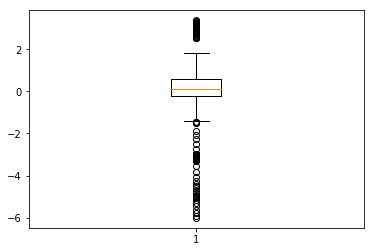

{'whiskers': [<matplotlib.lines.Line2D at 0x1ea8519ea90>,
 'caps': [<matplotlib.lines.Line2D at 0x1ea851a8390>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ea8519e940>],
 'medians': [<matplotlib.lines.Line2D at 0x1ea851a8c18>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ea851b20b8>],
 'means': []}

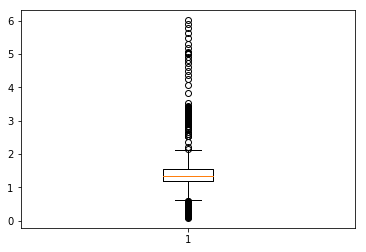

In [9]:
plt.boxplot(pedDf['sceneXVelocity'])
plt.show()
plt.boxplot(pedDf['speed'])

In [10]:
outliers = cleaner.getOutliersBySpeed(pedDf, byIQR=True, returnSpeed=True)
outliers

IQR value for column speed is: 0.40339522234238645
using range (0.8635602991306455, 2.477141188500191)


,speed
uniqueTrackId,
21426,5.031540
21549,6.014435
28230,3.433215
29106,3.244311
29238,3.360940
29240,3.399488


In [11]:
cleanPedDf = cleaner.cleanBySpeed(pedDf, byIQR=True)

IQR value for column speed is: 0.40339522234238645
using range (0.8635602991306455, 2.477141188500191)


C:\Users\adhocmaster\.conda\envs\drone\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\adhocmaster\.conda\envs\drone\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\adhocmaster\.conda\envs\drone\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\adhocmaster\.conda\envs\drone\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dime

AttributeError: 'NoneType' object has no attribute 'set_aspect'

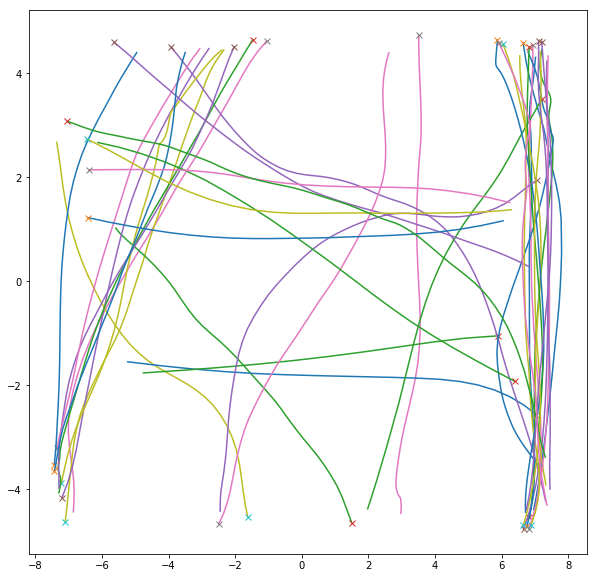

In [13]:
visualizer.show(pedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
# visualizer.show(cleanPedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')

In [ ]:
df18074 = pedDf[pedDf["uniqueTrackId"] == 18074]
# visualizer.show(df18074, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
df29586 = pedDf[pedDf["uniqueTrackId"] == 29586]
visualizer.show(pedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY', trackIds=[18074, 29586])

In [ ]:
X, Y = transformer.translateOneToLocalSource(df18074, "sceneX", "sceneY")
print(list(zip(X, Y)))

In [ ]:
trackDf["localX"]
trackDf["localY"]